# ID3 Algorthmus

https://youtu.be/coOTEc-0OGw?si=iUOf-QfaRRZ5Zi8s

https://youtu.be/K-oGwFoCGU0?si=oRTbbCoM3WuxnSyg

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---
**Algorithmus 1: Der allgemeine TDIDT-Algorithmus für das Lernen von Entscheidungsbäumen**

---
```
**Eingabe**: Datensatz D
**Ausgabe**: Wurzelknoten r des gelernten Baumes

TDIDT(D)
1: **if** "Alle Beispiele in D sind als 0 klassifiziert" **then**
2:     **return** "Neuer Klassifikationsknoten v mit cl(v) = 0"
3: **if** "Alle Beispiele in D sind als 1 klassifiziert" **then**
4:     **return** "Neuer Klassifikationsknoten v mit cl(v) = 1"
5: =  "Alle Beispiele in D haben identische Merkmalsausprägungen" **then**
6:     **return** "Neuer Klassifikationsknoten v mit cl(v) = x wobei x die am häufigsten in D vorkommende Klasse ist"
7: i = SelectFeature(D)
8: v = "Neuer Entscheidungsknoten mit att(v) = i"
9: **for** z ∈ Zi **do**
10:    D' = {(x, y) ∈ D | xi = z}
11:    v' = TDIDT(D')
12:    succ(v)(z) = v'
13: **return** v
```

In [3]:
df = pd.DataFrame({
    'a1': ['T','T', 'T', 'F', 'F', 'F'],
    'a2': ['T', 'T', 'F', 'F', 'T', 'T'],
    'Classification': [1,1,0,1,0,0]
})
df

,a1,a2,Classification
0,T,T,1
1,T,T,1
2,T,F,0
3,F,F,1
4,F,T,0
5,F,T,0


In [9]:
from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform) #X_enc = preprocessing.OrdinalEncoder().fit_transform(X)
df

,a1,a2,Classification
0,1,1,1
1,1,1,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,1,0


[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\ngini = 0.444\nsamples = 50.0%\nvalue = [0.667, 0.333]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 16.7%\nvalue = [0.0, 1.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 33.3%\nvalue = [1.0, 0.0]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\ngini = 0.444\nsamples = 50.0%\nvalue = [0.333, 0.667]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 16.7%\nvalue = [1.0, 0.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 33.3%\nvalue = [0.0, 1.0]')]

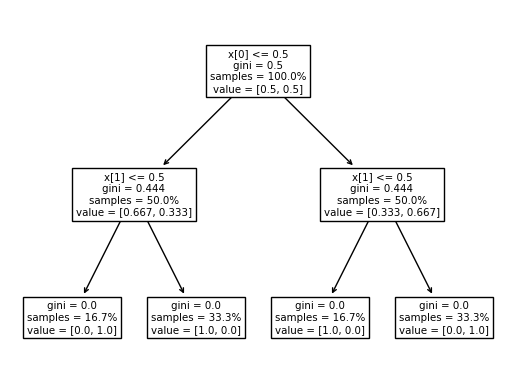

In [11]:
from sklearn.datasets import make_classification
import sklearn.metrics as metrics
from sklearn import tree

# Convert DataFrame to numpy arrays for processing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

clf = tree.DecisionTreeClassifier().fit(X, y)
y_pred = clf.predict(X)
tree.plot_tree(clf,proportion=True)

Die Spalten `a1` und `a2` sind die Merkmale des Datensatzes. 

Wir wählen ein Merkmal aus, machen es zur Wurzelknoten `r` des Baumes `T` und bauen den Baum von dort auf. Wir wählen den Merkmal `a1`.

die Spalte `a1` hat zwei mögliche Werte **T** und **F**.
$$Vlaues(a_1) = {T, F}$$

1. Entropie des ganzen Merkmals `a1` berechnen:
   Insgesamt gibt es 3 Ts und 3 Fs. D.h. $$S = [+3, -3]$$.
   --> $$Entropie(S) = 1$$

2. Entropie der vereinzelnen Werte des Merkmals `a1` berechnen:
   - `Für 3 Ts`: 2 Ts sind als 1 klassifiziert und 1 T ist als 0 klassifiziert.

      --> $S_T = [+2, -1]$

      --> $Entropie(S_T) = -\frac{2}{3}*log_2\frac{2}{3} - \frac{1}{3}*log_2\frac{1}{3} = 0.918 $
   - `für 3 Fs`: 2 Fs sind als 0 klassifiziert und 1 F ist als 1 klassifiziert.

      --> $S_F = [+1, -2]$
     
      --> $Entropie(S_F) = -\frac{1}{3}*log_2\frac{1}{3} - \frac{2}{3}*log_2\frac{2}{3} = 0.918$

$ Entropie(S_{Beispiel}) = -\frac{\text{Positive Beipsiele}}{\text{alle beispiele}}*log_2\frac{\text{Positive Beipsiele}}{\text{alle beispiele}} - \frac{\text{Negative Beipsiele}}{\text{alle beispiele}}*log_2\frac{\text{Negative Beipsiele}}{\text{alle beispiele}}$
> - Wenn die Anzahl positive und negative Beispiele gelich sind --> $Entropie(S) = 1$
> - Wenn es nur positive Beispiele bzw. nur negative Beispiele gibt --> $Entropie(S) = 0$

3. $Gain(S, a_1)$ berechnen:

$$
Gain(S, a_1) = Entropie(S) -\sum_{v \in \text{T,F}} \frac{|S_v|}{|S|} Entropie(S_v)
$$

Für unser Beispiel heißt das:
$$
Gain(S, a_1) = 1 -(\frac{3}{6}*0.918 + \frac{3}{6}*0.918) = 0.082
$$

3. Entropie von `a2` berechnen:
   Insgesamt gibt es **4** Ts und **2** Fs. D.h. $$S = [+3, -3]$$.
   --> $$Entropie(S) = 1 $$
   - `Für 4 Ts`: 2 Ts sind als 1 klassifiziert und 2 T ist als 0 klassifiziert.

      --> $S_T = [+2, -2]$

      --> $Entropie(S_T) = 1 $
   - `für 2 Fs`: 1 F sind als 0 klassifiziert und 1 F ist als 1 klassifiziert.

      --> $S_F = [+1, -1]$
     
      --> $Entropie(S_F) = 1$

$$
Gain(S, a_2) = 1 -(\frac{4}{6}*1 + \frac{2}{6}*1) = 0
$$

4. `maxGain` berechnen:
$$maxGain(Gain(S, a_1), Gain(S, a_2)) = Gain(S, a_1) = 0.0817$$

**-->** $a_1$ ist unser <ins>Wurzelknoten</ins>.

![Entscheidungsbaum_df](./dataset/Entscheidungsbaum_df.PNG)

In [13]:
import pandas as pd

D_tennis = pd.read_csv("./dataset/dataset_tennis.csv")
D_tennis

,outlook,temperature,humidity,wind,tennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes
